# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta

In [2]:
data = pd.read_excel(r"D:\SIM\Elevvo\onlineretail\OnlineRetail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Data Inspection

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
#check for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#check for duplicate values
len(data[data.duplicated()])

5268

# Data Cleaning

In [7]:
#remove duplicate values and check
data= data.drop_duplicates()
len(data[data.duplicated()])

0

In [8]:
#removing rows without customer id
data = data[data['CustomerID'].notnull()]
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#remove cancelled orders (negative quantity)
data = data[data['Quantity'] > 0]

# Feature Engineering

In [10]:
#create column for total price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [11]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [14]:
#setting a reference date
ref_date = data['InvoiceDate'].max() + timedelta(days=1)

# RFM Analysis

In [39]:
#calculating RFM (Recency, Frequency, Monetary)
rfm = data.groupby('CustomerID').agg({ 'InvoiceDate': lambda x: (ref_date - x.max()).days,
                                      'InvoiceNo':  lambda num: num.nunique(),
                                      'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [40]:
#renaming rfm columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.sample(10)

,Recency,Frequency,Monetary
CustomerID,,,
15024.0,10,10,1636.43
17094.0,322,1,302.00
15399.0,1,3,815.77
17384.0,19,2,336.40
12559.0,311,2,561.71
18084.0,16,1,90.48
17189.0,106,2,383.75
12623.0,276,1,305.10
12522.0,39,2,192.72


In [46]:
#to remove customers whose total spending is 0
rfm=rfm[rfm['Monetary']>0]

In [49]:
#Calculate recency score, frequency score, monetary score
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]) #most recent meaning less amount of days and higher recency score
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,7,4310.00,5,5,5
12348.0,75,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,1,4
12350.0,310,1,334.40,1,1,2


In [50]:
#Calculate RFM score
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,7,4310.00,5,5,5,555
12348.0,75,4,1797.24,2,4,4,244
12349.0,19,1,1757.55,4,1,4,414
12350.0,310,1,334.40,1,1,2,112


In [61]:
#segmenting customers based on their RFM scores
def segment_customer(row):
    if row['R_score'] == 5 and row['F_score'] == 5:
        return 'Champions'
    elif row['R_score'] >= 4 and row['F_score'] >= 4:
        return 'Loyal Customers'
    elif row['M_score'] >= 4:
        return 'Big Spenders'
    elif row['R_score'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm.sample(10)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
CustomerID,,,,,,,,
13684.0,286,1,65.13,1,1,1,111,At Risk
16099.0,50,3,731.90,3,4,3,343,Others
15453.0,2,7,1371.77,5,5,4,554,Champions
17561.0,19,1,165.12,4,2,1,421,Others
18146.0,141,2,160.35,2,3,1,231,At Risk
16016.0,3,8,1465.51,5,5,4,554,Champions
14321.0,11,5,1530.75,5,4,4,544,Loyal Customers
15497.0,18,2,1262.20,4,3,4,434,Big Spenders
16395.0,61,5,1482.06,3,4,4,344,Big Spenders


# Data Visulaization

C:\Users\Omama\AppData\Local\Temp\ipykernel_11168\2324123745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='deep')


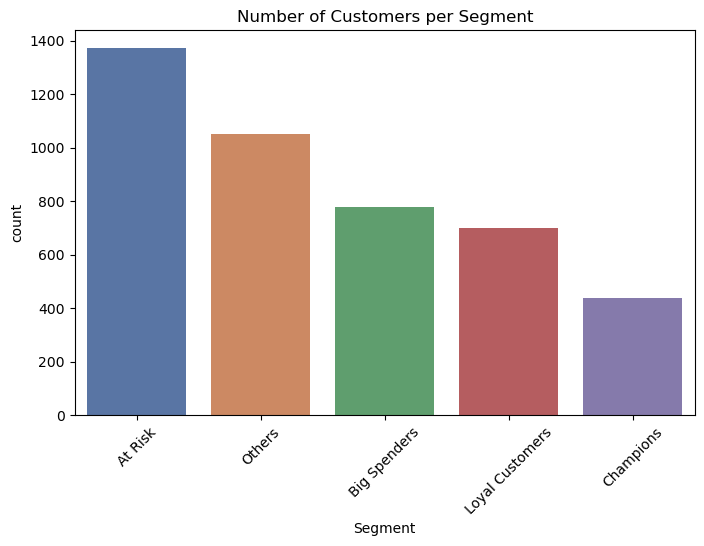

In [67]:
#Bar chart to show customers count per segment
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='deep')
plt.title("Number of Customers per Segment")
plt.xticks(rotation=45)
plt.show()

C:\Users\Omama\AppData\Local\Temp\ipykernel_11168\924721968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_score','F_score']).agg({'Monetary':'mean'}).reset_index()


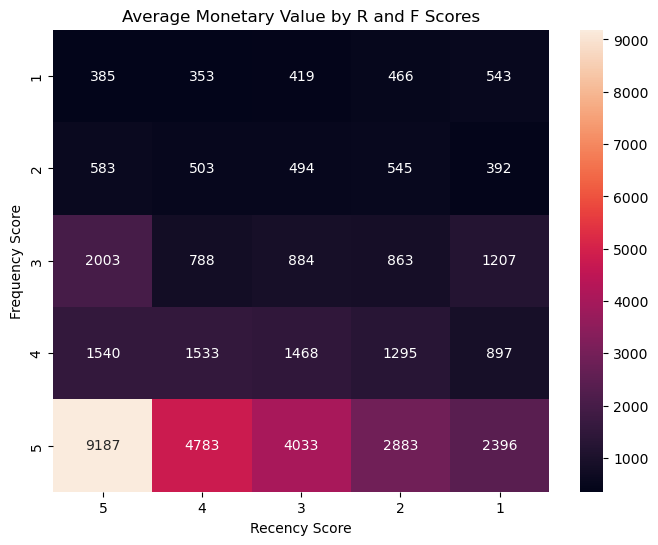

In [70]:
#Heatmap showing average money spent by customers based on recency and frequency
rfm_heatmap = rfm.groupby(['R_score','F_score']).agg({'Monetary':'mean'}).reset_index()
rfm_pivot = rfm_heatmap.pivot(index='F_score', columns='R_score', values='Monetary')

plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f")
plt.title("Average Monetary Value by R and F Scores")
plt.xlabel("Recency Score")
plt.ylabel("Frequency Score")
plt.show()

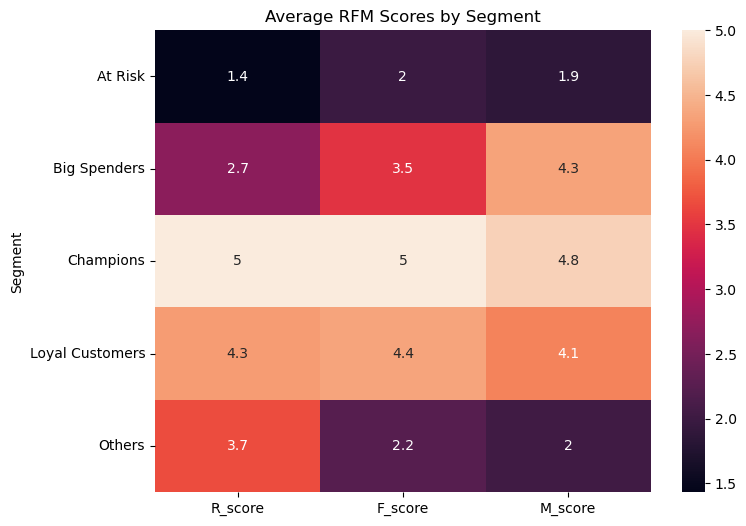

In [72]:
#Heatmap showing average RFM scores by segment
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm['M_score'] = rfm['M_score'].astype(int)
segmentavg = rfm.groupby('Segment')[['R_score', 'F_score', 'M_score']].mean()
plt.figure(figsize=(8,6))
sns.heatmap(segmentavg, annot=True)
plt.title('Average RFM Scores by Segment')
plt.show()

# Marketing Ideas

**1. Champions** – (very recent & frequent buyers)

-Give early access to new products.

-Offer VIP rewards or thank-you gifts.

**2. Loyal Customers** – (buy often, but not top spenders)

-Recommend related products they might like.

-Give special discounts on repeat purchases.

**3. Big Spenders** – (spend a lot, but not always recent/frequent)

-Offer exclusive high-value bundles.

-Give free shipping or premium perks.

**4. At Risk** – (haven’t bought in a while)

-Send “We miss you” discounts.

-Give limited-time deals to bring them back.

**5. Others** – (new or low-value customers)

-Share brand intro emails or guides.

-Offer small discounts or samples to try more products.